In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
sstable_path = './ar_keys'
keys = []
with open(sstable_path, "rb") as f:
    num_keys = int.from_bytes(f.read(8), 'little')
    key_size = int.from_bytes(f.read(2), 'little')
    padding = int.from_bytes(f.read(6), 'little')
    print("NumKeys:" + str(num_keys))
    print("KeySize:" + str(key_size))
    print("Padding:" + str(padding))
    for i in range(num_keys):
        keys.append(f.read(key_size))
print("Keys Loaded!")

NumKeys:7982102
KeySize:16
Padding:0
Keys Loaded!


In [31]:
def is_sorted(bytekeys, num_keys):
    for i in range(1, num_keys):
        if bytekeys[i-1] > bytekeys[i]:
            print(i-1, bytekeys[i-1])
            return False
    return True

def key_to_double(bytekey, key_size):
    ret = 0
    for i in range(key_size):
        ret = ret * 256 + bytekey[i]
    return ret

def build_emp_cdf(keys, key_size):
    x = []
    y = []
    idx = 0
    for key in keys:
        x.append(key_to_double(key, key_size))
        y.append(idx)
        idx = idx + 1
    return (x,y)

print("Keys are sorted: " + str(is_sorted(keys, num_keys)))
key_to_double(keys[100], key_size)

emp_cdf = build_emp_cdf(keys, key_size)


Keys are sorted: True


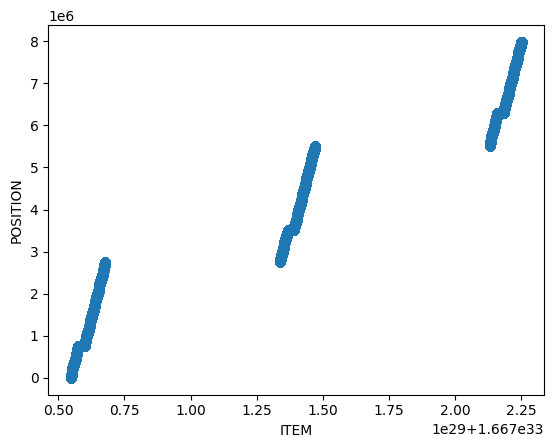

In [33]:
plt.xlabel('ITEM')
plt.ylabel('POSITION')
plt.scatter(emp_cdf[0], emp_cdf[1])
plt.show()